In [282]:
from matplotlib import pyplot as plt
import numpy as np

In [283]:
imgs = [plt.imread(f'images/img{i}.png') for i in range(4)]
for i in range(4):
    imgs[i][:,:,2] = 0

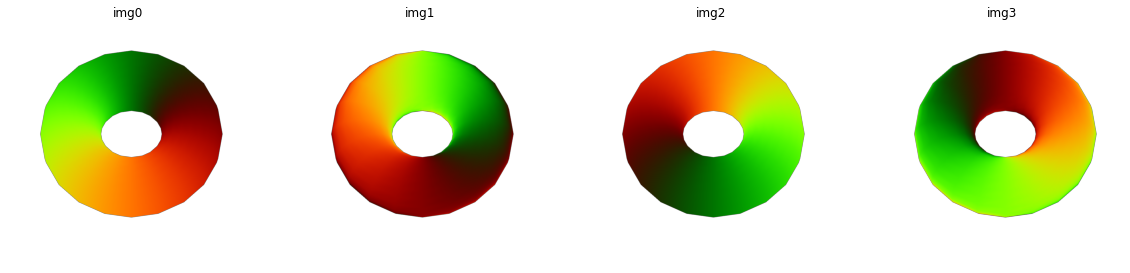

In [284]:
plt.figure(figsize=(20,20))
for i,img in enumerate(imgs):
    plt.subplot(1,len(imgs),i+1)
    plt.imshow(img)
    plt.title(f'img{i}')
    plt.axis('off')

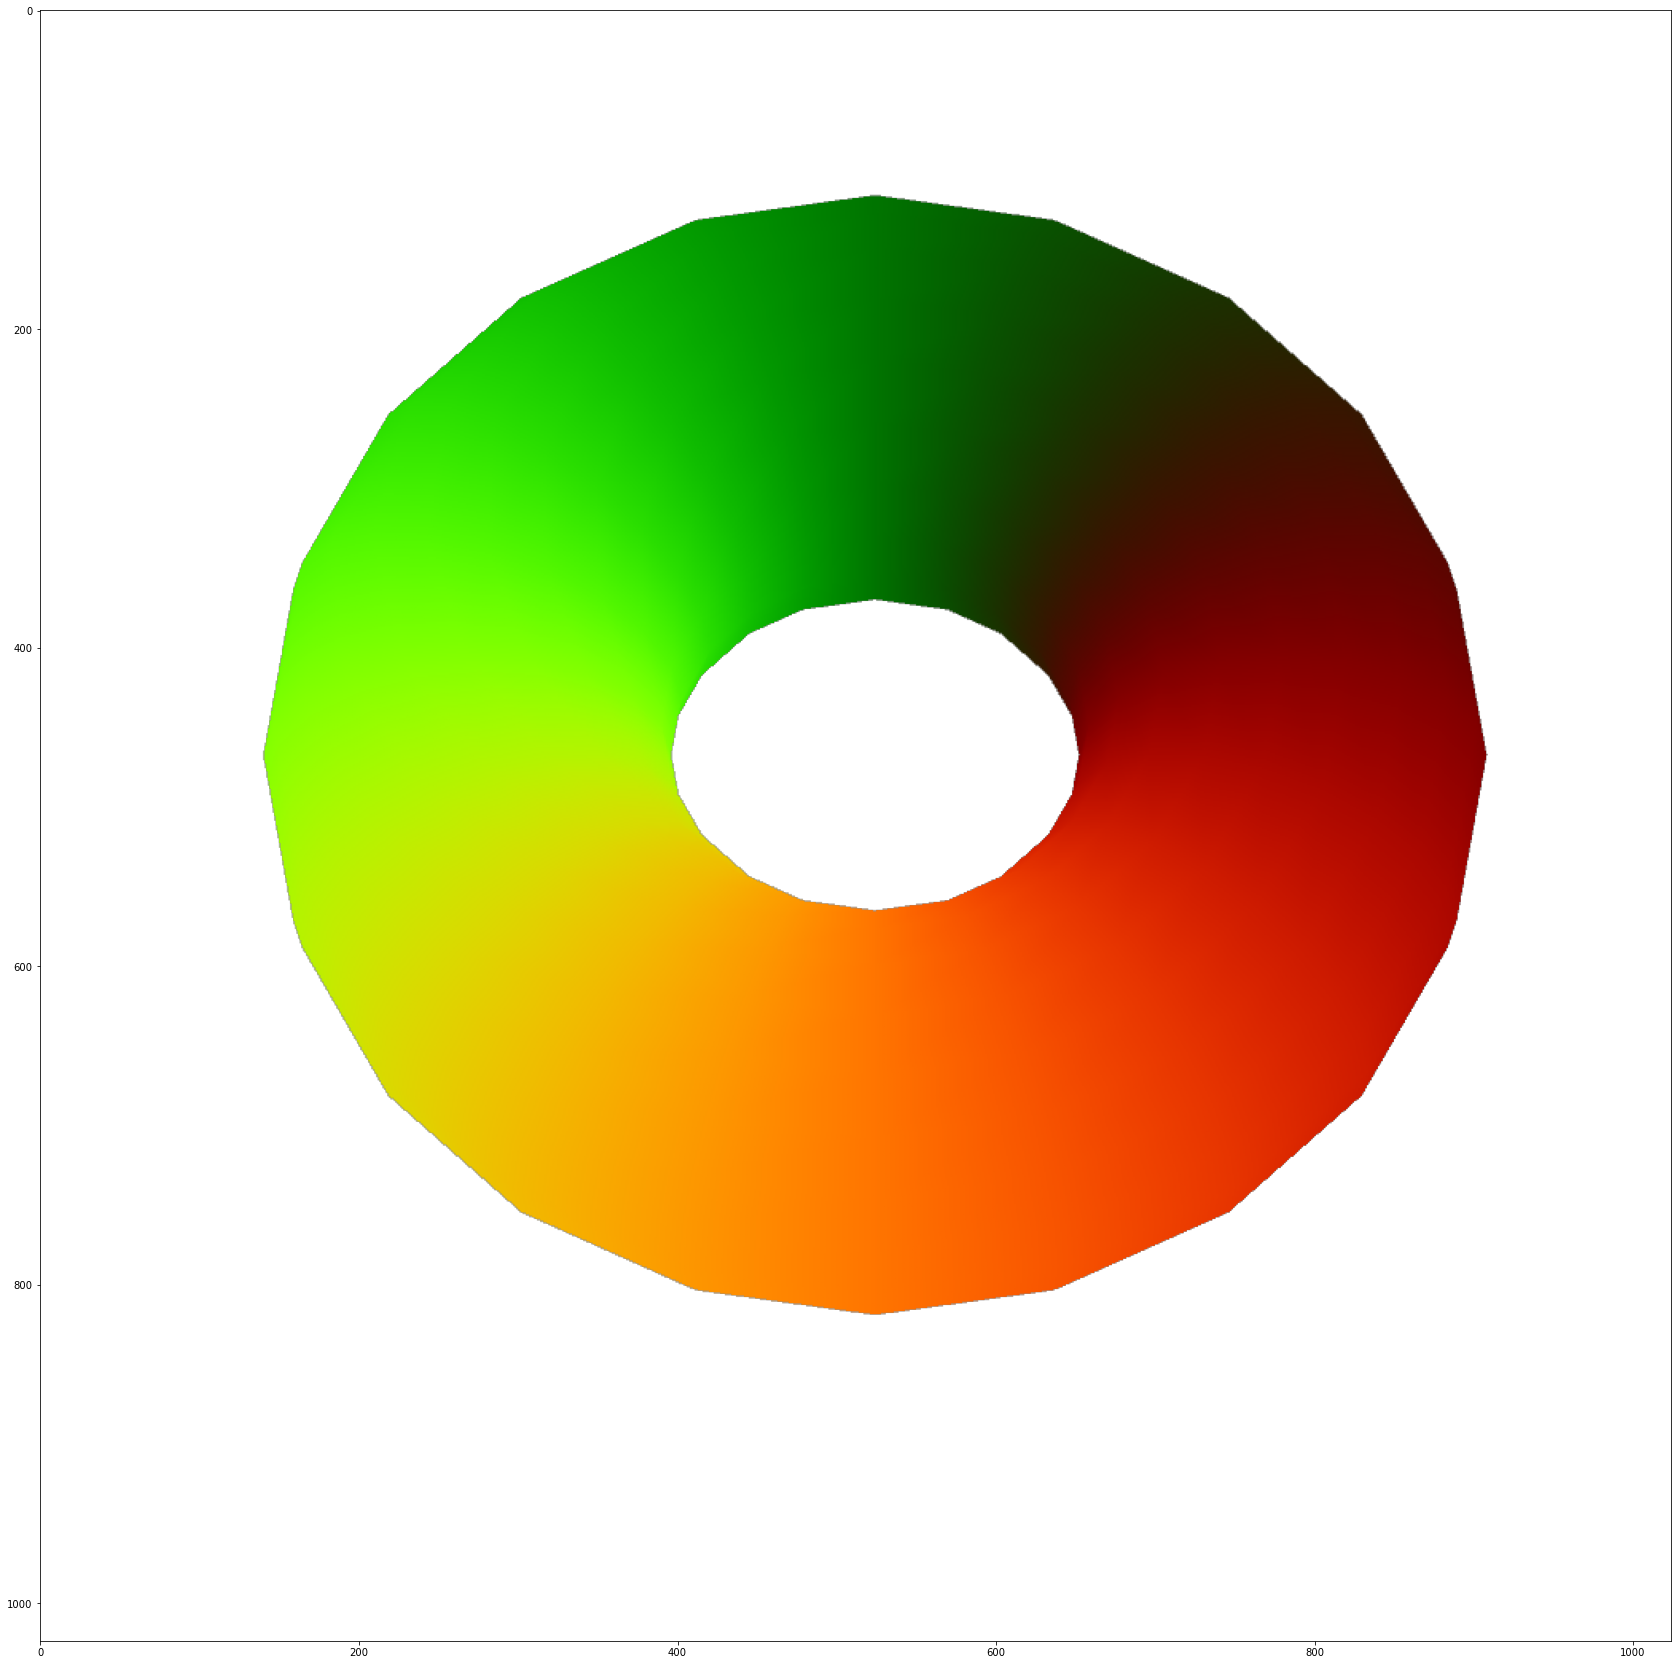

In [285]:
plt.figure(figsize=(30,30))
plt.imshow(imgs[0])
imgs[0][200,400,:2] = 0
# plt.scatter([200], [400])
plt.show()

### Plot vector field

In [286]:
def image_field(img):
    field = 2 * img[:,:,:2] - np.array([1,1])
    return field * np.array([1,-1])/ np.linalg.norm(field, axis=2, keepdims=True)

image_field(imgs[0])[400,200]

array([-0.04309717, -0.99907089])

In [287]:
imgFields = [image_field(img) for img in imgs]

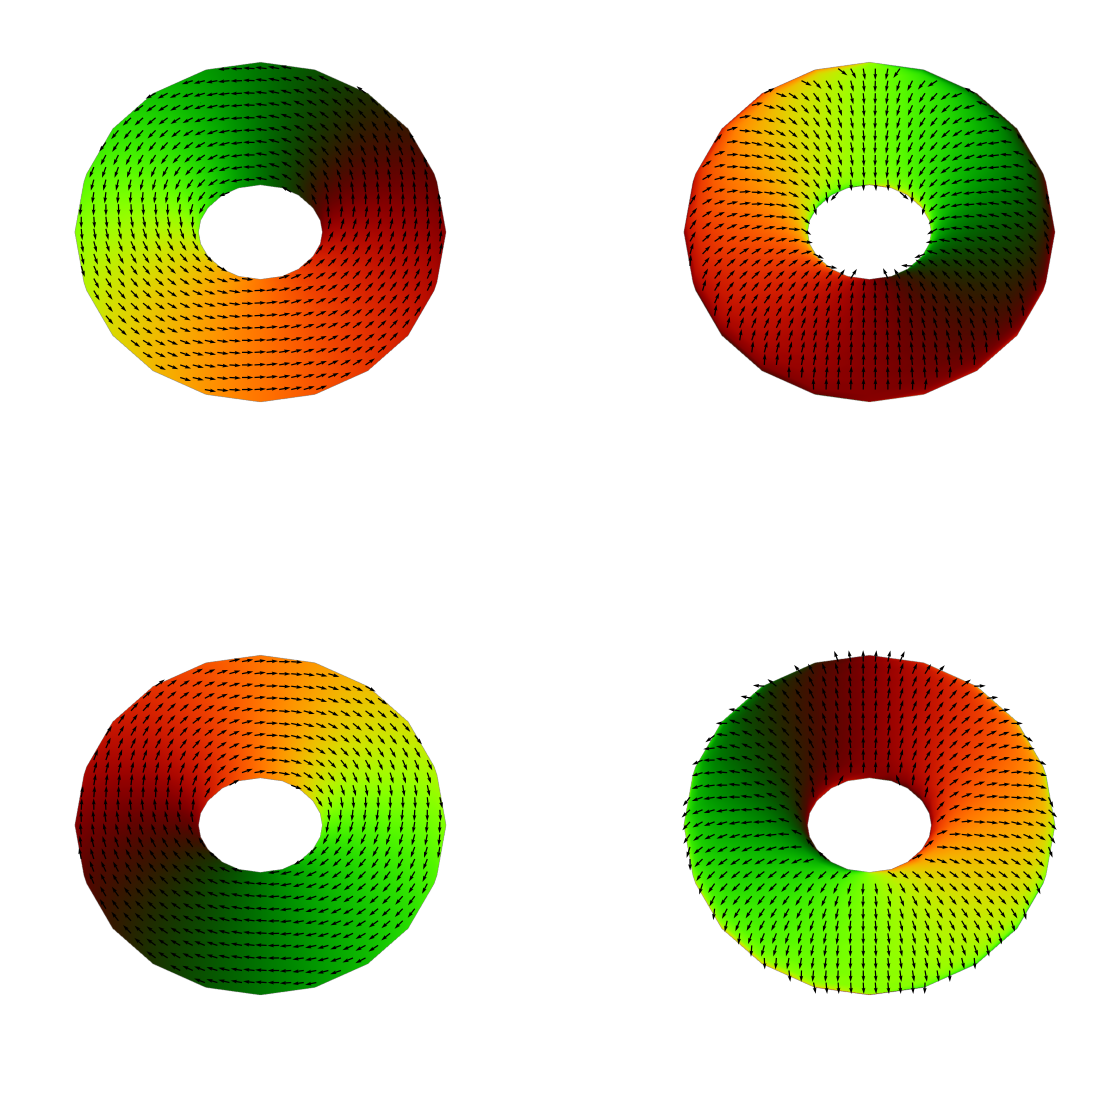

In [288]:
# get a grid on the image
def plot_vector_field(ax, imgField, den=40):
#     plt.scatter([200],[400])
#     plt.quiver(200,400, 1,1)
    n = imgField.shape[0]
    m = imgField.shape[1]
    X = np.linspace(0, n, den, dtype=np.int64, endpoint=False)
    Y = np.linspace(0, m, den, dtype=np.int64, endpoint=False)
    pos = []
    vec = []
    for x in X:
        for y in Y:
            if img[x,y,-1] == 1: # not transparent
                pos.append([y,x])
                vec.append(imgField[x,y])
    pos = np.vstack(pos)
    vec = np.vstack(vec)
#     return pos,vec
    ax.quiver(pos[:,0], pos[:,1], vec[:,0], vec[:,1])
#     ax.scatter(pos[:,0],pos[:,1])
    
fig, axs = plt.subplots(2,2, figsize=(20,20))
for ax,img,imgf in zip(axs.flatten(), imgs, imgFields):
    ax.imshow(img)
    plot_vector_field(ax, imgf)
    ax.axis('off')
plt.show()

[]

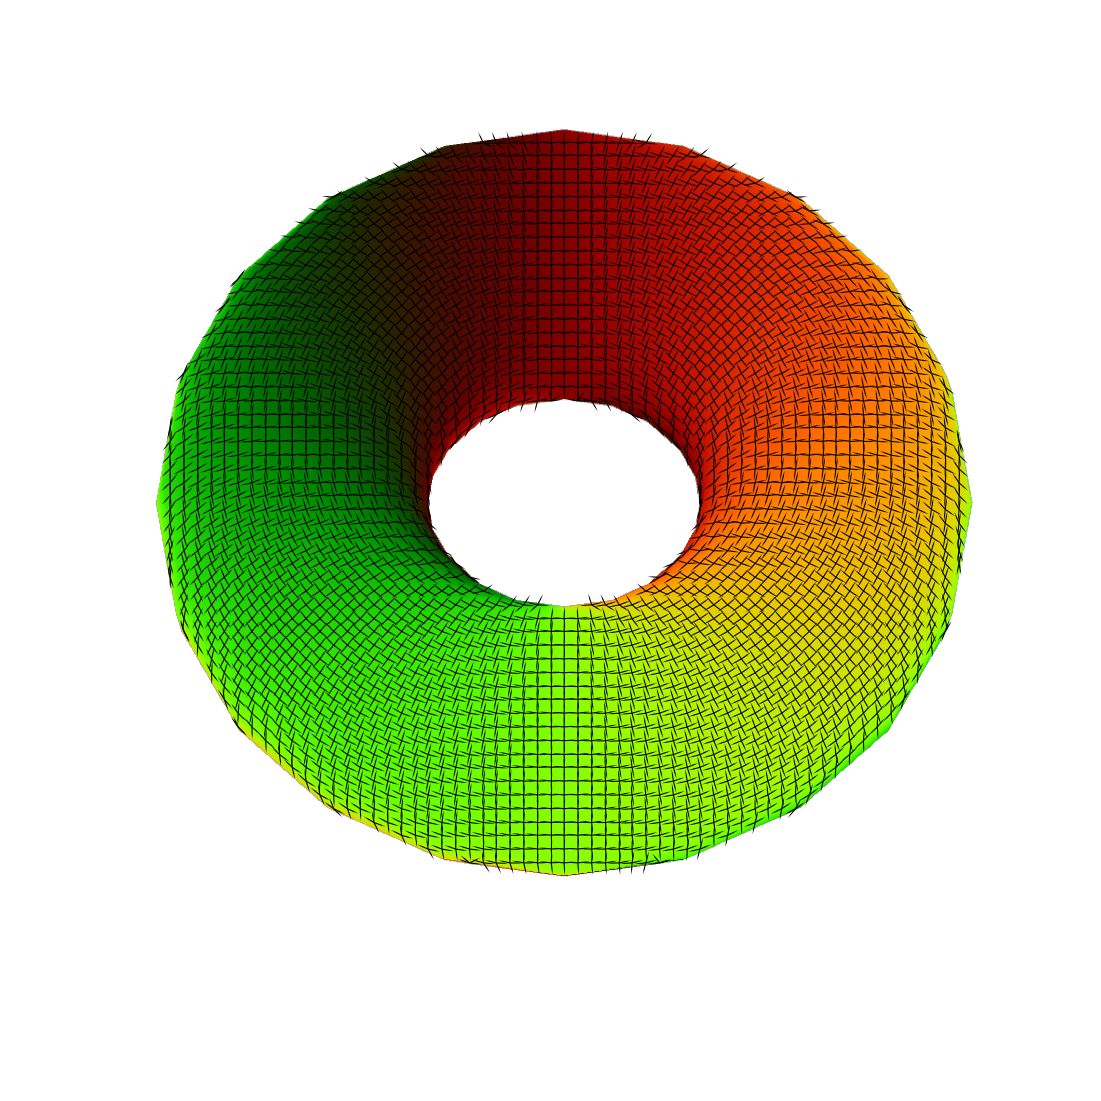

In [289]:
# get a grid on the image
def plot_vector_field(ax, imgField, den=80):
#     plt.scatter([200],[400])
#     plt.quiver(200,400, 1,1)
    n = imgField.shape[0]
    m = imgField.shape[1]
    X = np.linspace(0, n, den, dtype=np.int64, endpoint=False)
    Y = np.linspace(0, m, den, dtype=np.int64, endpoint=False)
    pos = []
    vec = []
    for x in X:
        for y in Y:
            if img[x,y,-1] == 1: # not transparent
                pos.append([y,x])
                vec.append(imgField[x,y])
    pos = np.vstack(pos)
    vec = np.vstack(vec)
#     return pos,vec
    return pos,vec
#     ax.quiver(pos[:,0], pos[:,1], vec[:,0], vec[:,1])
#     ax.scatter(pos[:,0],pos[:,1])
    
fig, ax = plt.subplots(figsize=(20,20))
ax.imshow(img)
ax.axis('off')
poss = []
vecc = []
for img,imgf in zip(imgs, imgFields):
    pos, vec = plot_vector_field(ax, imgf)
    poss.append(pos)
    vecc.append(vec)
    
poss = np.vstack(poss)
vecc = np.vstack(vecc)

ax.quiver(poss[:,0], poss[:,1], vecc[:,0], vecc[:,1], headwidth=1, width=0.001, scale=90)
plt.plot()

## Draw line based on imgField

In [290]:
mask = imgs[0][:,:,3] == 1

In [291]:
field = np.stack(imgFields)
field.shape

(4, 1024, 1024, 2)

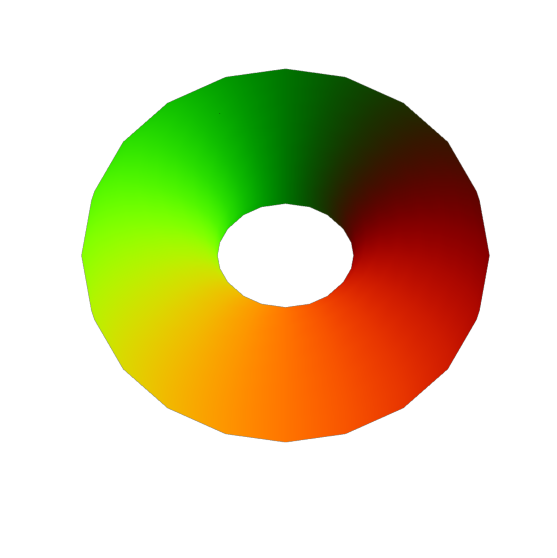

In [292]:
point = np.array([200.0,400.0])
direction = np.array([1.0,0.0])

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(imgs[0])

def draw_line(ax, point, direction):
    line = []
#     coss = []
    for i in range(1000):
        idx = point.astype(np.int64)
        if not mask[idx[0], idx[1]]:
            break
        line.append(np.array([idx[1], idx[0]]))
        vs = field[:, idx[0], idx[1]]
        vs_cos = np.dot(vs, direction)
        choice = np.argmax(vs_cos)
        cos_choice = vs_cos[choice]
#         coss.append(cos_choice)
        if cos_choice > 0.95:
            best_dir = vs[choice]
        else:
            break;
        point += best_dir*3
        direction = best_dir    
    #     plt.quiver(point[0], point[1], direction[0], direction[1])
    line = np.vstack(line)
    ax.plot(line[:,0], line[:,1])
    ax.axis('off')

draw_line(ax, point, direction)

In [293]:
random_points = np.argwhere(mask)
np.random.shuffle(random_points)

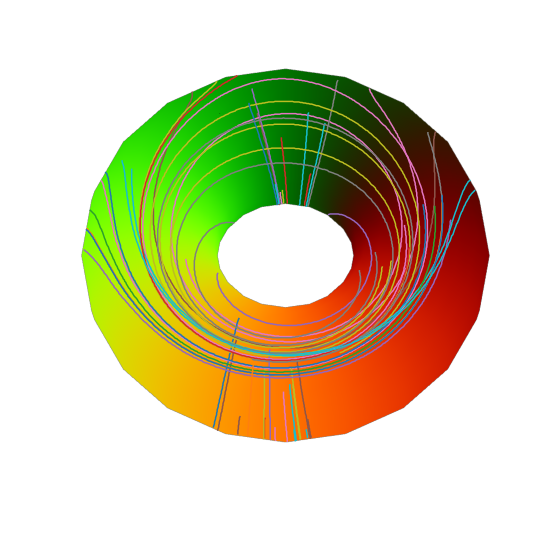

In [294]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(imgs[0])
for i in range(100):
    draw_line(ax, random_points[i].astype(np.float32), np.array([1,0]))
    
plt.show()

### Time to be smarter and put some spacing

In [15]:
from PIL import Image, ImageDraw

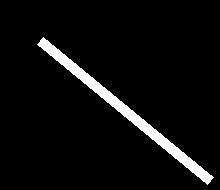

In [455]:
w, h = 220, 190
shape = [(40, 40), (w - 10, h - 10)] 
  
# creating new Image object 
img = Image.new("RGB", (w, h)) 
  
# create line image 
img1 = ImageDraw.Draw(img)
img1.line(shape, width = 10) 
img 